# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

** Import visualization libraries and set %matplotlib inline. **

In [3]:
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv("911.csv")

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [7]:
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [8]:
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
df["title"].nunique()

110

In [5]:
len(df["title"].unique())

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [6]:
x = df["title"].iloc[0]
x.split(":")[0]

'EMS'

In [9]:
df["Reason"] = df["title"].apply(lambda title: title.split(":")[0])
df["Reason"]

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [10]:
df["Reason"].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [83]:
# reason = []

# for n in range(len(df["title"])):
#     reason_part = str(df["title"][n]).split(":")[0]
#     reason.append(reason_part)

x = df["title"].iloc[0]
x.split(":")[0]

df["Reason"] = df["title"].apply(lambda title: title.split(":")[0])
df["Reason"]

# df["Reason"] = pd.Series(reason)

# df["Reason"].head()

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

str

In [81]:
reason=[]

for n in range(len(df["title"])):
    reason_part = df["title"][n].split(":")[0]
    reason.append(reason_part)
    
df["Reason"] = pd.Series(reason)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,dayofweek,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10


** What is the most common Reason for a 911 call based off of this new column? **

In [12]:
data = df["Reason"].value_counts()
data

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

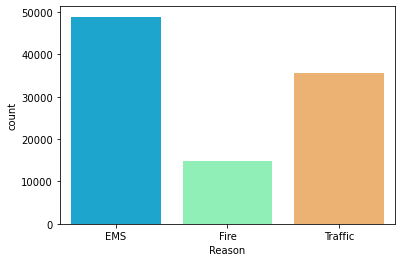

In [15]:
sns.countplot(x="Reason", data=df, palette ="rainbow")

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [14]:
type(df["timeStamp"][0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [16]:
from datetime import datetime as dt

In [17]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [18]:
type(df["timeStamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [19]:
time = df["timeStamp"].iloc[0]
time.hour

17

In [21]:
time.dayofweek

3

In [84]:
df["Hour"] = df["timeStamp"].apply(lambda time: time.hour)

In [22]:
df["Hour"]= df["timeStamp"].apply(lambda time: time.hour)

In [23]:
df["Month"]= df["timeStamp"].apply(lambda time: time.month)

In [24]:
df["dayofweek"]= df["timeStamp"].apply(lambda time: time.dayofweek)

In [18]:
hour = []
month = []

for n in range (len(df["timeStamp"])):
    hour.append(df["timeStamp"].iloc[n].hour)
    month.append(df["timeStamp"].iloc[n].month)
    
df["Hour"] = pd.Series(hour)
df["Month"] = pd.Series(month)

In [19]:
day_of_week= []
for n in range (len(df["timeStamp"])):
    day_of_week.append(df["timeStamp"].iloc[n].day_of_week)
    
df["Day of Week"] = pd.Series(day_of_week)

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [25]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df["Day of week"] = df["dayofweek"].map(dmap)

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,dayofweek,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thu


In [85]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df["Day of week"] = df["dayofweek"].map(dmap)

# dayofweek의 값들이 하나씩 딕셔너리의 값을 iterate하면서 key에 맞는 value값을 출력할 것


# map 함수: a = list(map(int,a))이고, a = [1,2,3,4]라면, int(a[0])-int(a[3])까지 iterate하는 것

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

weekday =[]

for n in day_of_week:
    for item in dmap:
        if n == item:
            weekday.append(dmap[item])

df["Weekday"] = pd.Series(weekday)

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Weekday
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

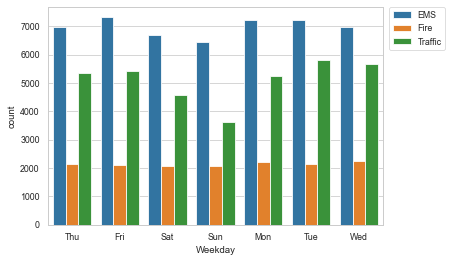

In [24]:
sns.set_style("whitegrid")
sns.set_context("paper")
sns.countplot(x="Weekday", data= df, hue = "Reason")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**Now do the same for Month:**

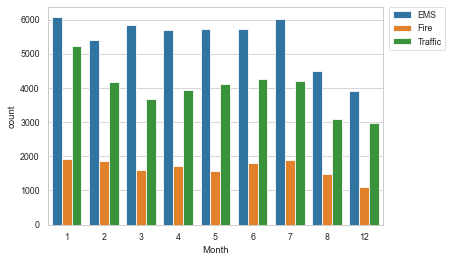

In [25]:
sns.set_style("whitegrid")
sns.set_context("paper")
sns.countplot(x="Month", data= df, hue = "Reason")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [29]:
byMonth = df.groupby("Month").count()
byMonth.head() #count를 바로 갖다 붙이고 그 다음 Plot도 바로 갖다 붙이기

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,dayofweek,Day of week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

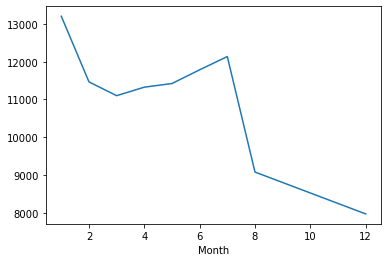

In [30]:
byMonth["lat"].plot()

No handles with labels found to put in legend.


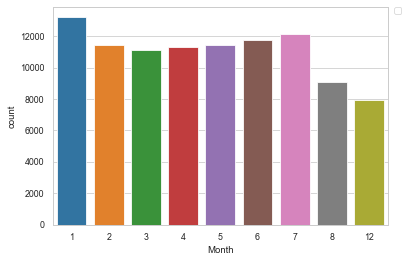

In [51]:
sns.set_style("whitegrid")
sns.set_context("paper")
sns.countplot(x="Month", data= df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [58]:
byMonth = df.groupby(df["Month"])

In [59]:
count_by_month = byMonth.count().iloc[:,1]

In [60]:
count_by_month = pd.Series(count_by_month)

In [61]:
count_by_month

Month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: lng, dtype: int64

In [62]:
count_by_month = count_by_month.reset_index()

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

(7000.0, 14000.0)

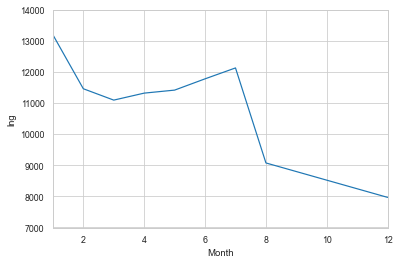

In [46]:
lineplot = sns.lineplot(data=count_by_month)
lineplot.set_xlim([1,12])
lineplot.set_ylim([7000,14000])

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [64]:
count_by_month

,Month,lng
0,1,13205
1,2,11467
2,3,11101
3,4,11326
4,5,11423
5,6,11786
6,7,12137
7,8,9078
8,12,7969


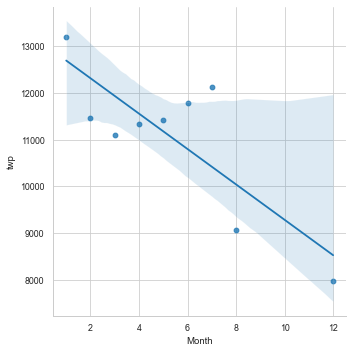

In [33]:
graph = sns.lmplot(x="Month",y="twp", data=byMonth.reset_index())
graph

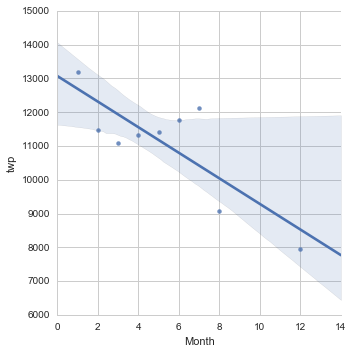

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [36]:
t = df["timeStamp"].iloc[0]

In [38]:
df["Date"] = df["timeStamp"].apply(lambda t:t.date())

In [47]:
date = df.groupby("Date").count()["lat"]

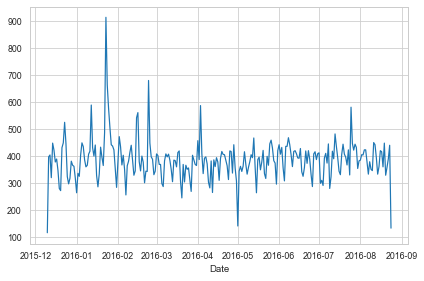

In [52]:
date.plot()
plt.tight_layout()

In [117]:
from datetime import datetime

date = []

for n in range (len(df["timeStamp"])):
    dt_obj = (df["timeStamp"].iloc[n]).to_pydatetime().strftime("%m %Y")
    date.append(dt_obj)
    
df["Date"] = pd.Series(date)

In [132]:
group_by_date = df.groupby(df["Date"]).count()["twp"]

In [133]:
group_by_date.head() 

Date
01 2016    13203
02 2016    11465
03 2016    11092
04 2016    11323
05 2016    11420
Name: twp, dtype: int64

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

<AxesSubplot:xlabel='Date'>

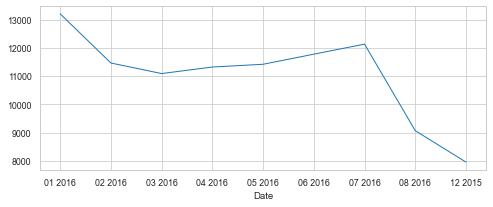

In [134]:
graph = group_by_date.plot.line(x="Date", y="twp",figsize=(8,3), lw=1)
graph

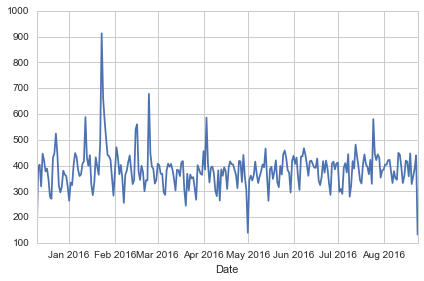

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

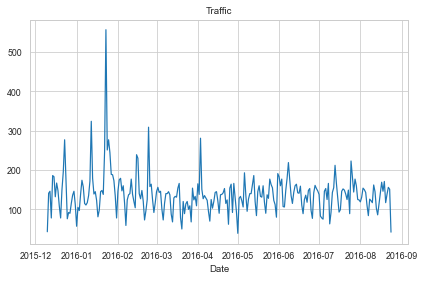

In [54]:
df[df["Reason"]=="Traffic"].groupby("Date").count()["lat"].plot()
plt.title("Traffic")
plt.tight_layout()

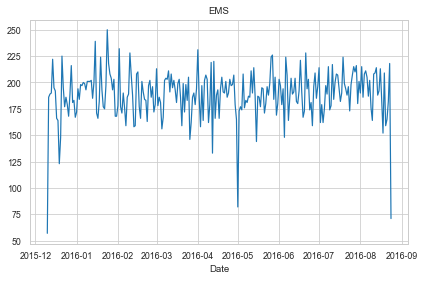

In [55]:
df[df["Reason"]=="EMS"].groupby("Date").count()["lat"].plot()
plt.title("EMS")
plt.tight_layout()

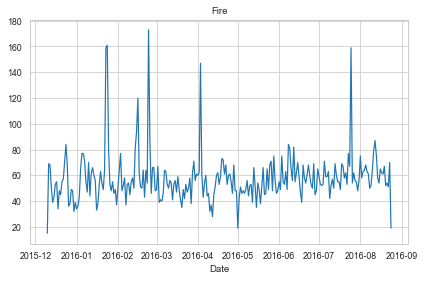

In [56]:
df[df["Reason"]=="Fire"].groupby("Date").count()["lat"].plot()
plt.title("Fire")
plt.tight_layout()

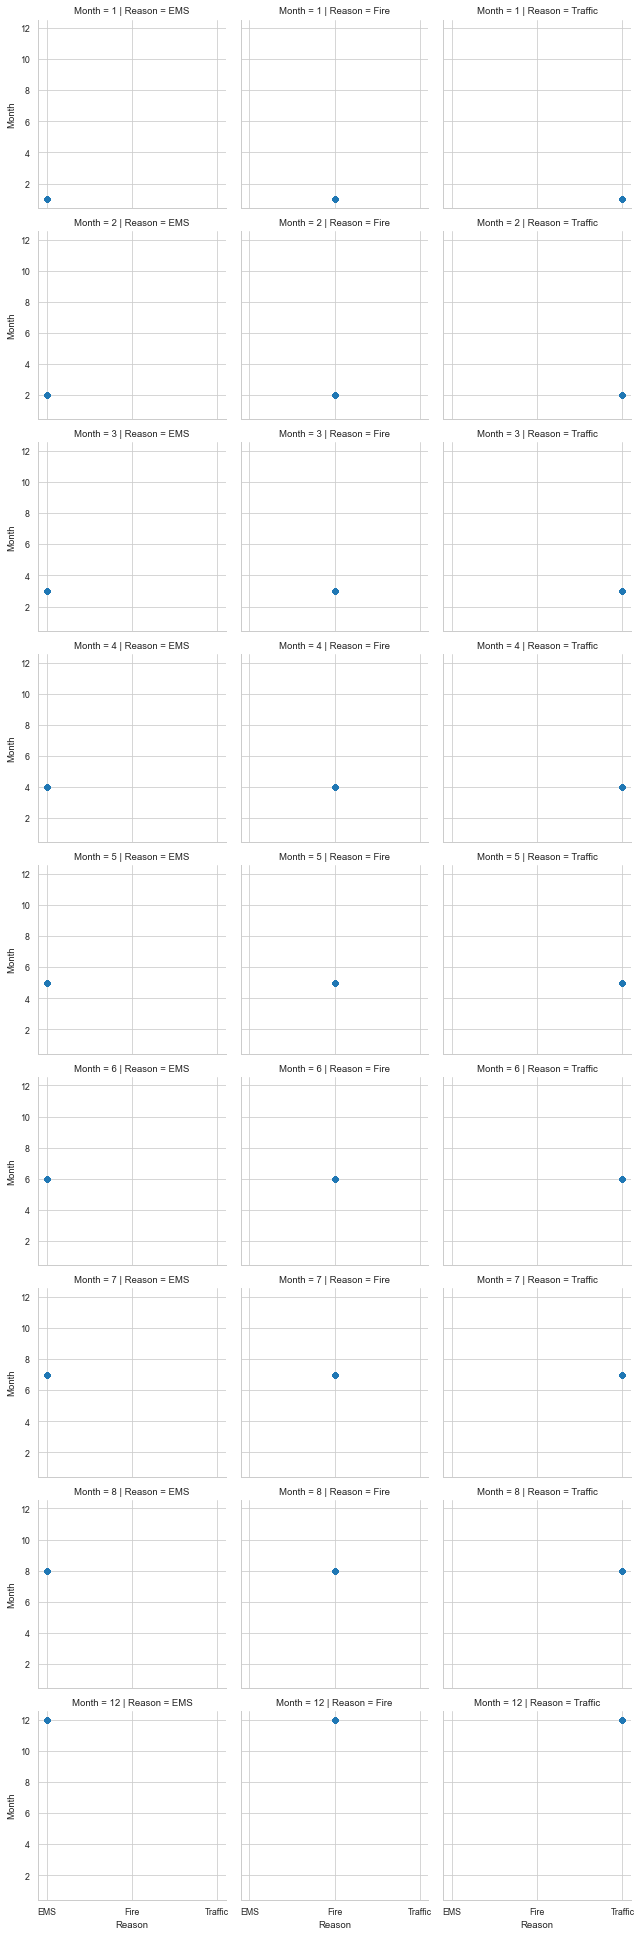

In [139]:
# group_by_reason = df.groupby(df["Reason"]).count()
# group_by_reason

# group_by_reason= df.groupby(df["Date"]).count()["Reason"]
# group_by_reason

gg = sns.FacetGrid(data=df, col="Reason", row="Month")

gg.map(plt.scatter, "Reason", "Month")

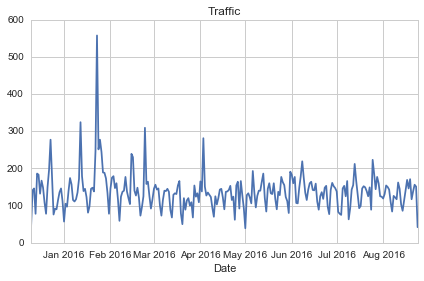

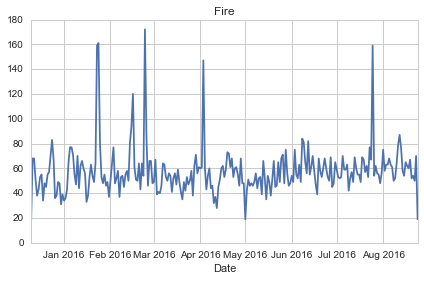

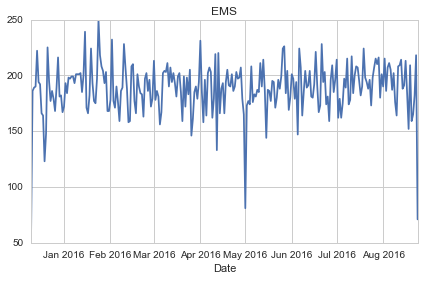

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [68]:
new_df = df.groupby(by=["Day of week","Hour"]).count()["Reason"].unstack()
new_df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day of week'>

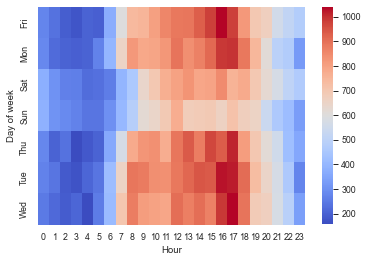

In [63]:
sns.heatmap(new_df, cmap="coolwarm")

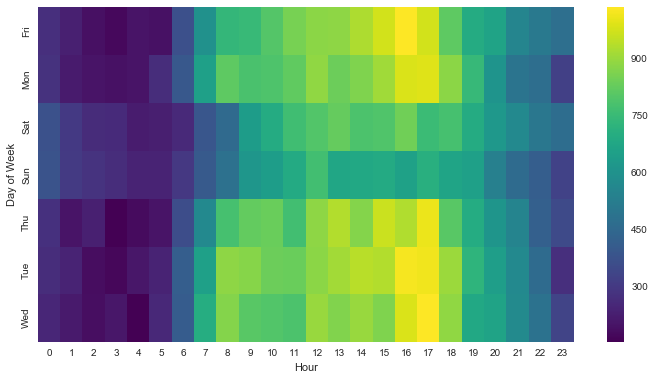

** Now create a clustermap using this DataFrame. **

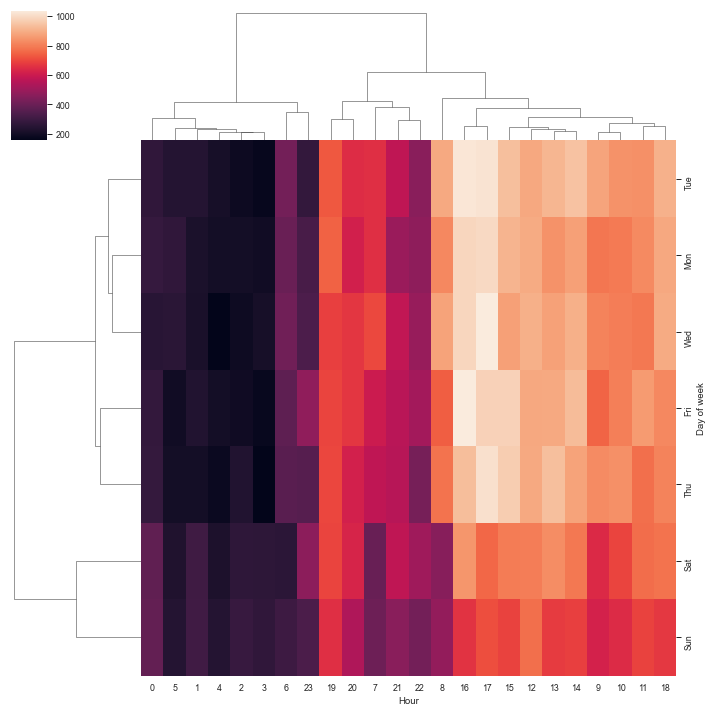

In [64]:
sns.clustermap(new_df)

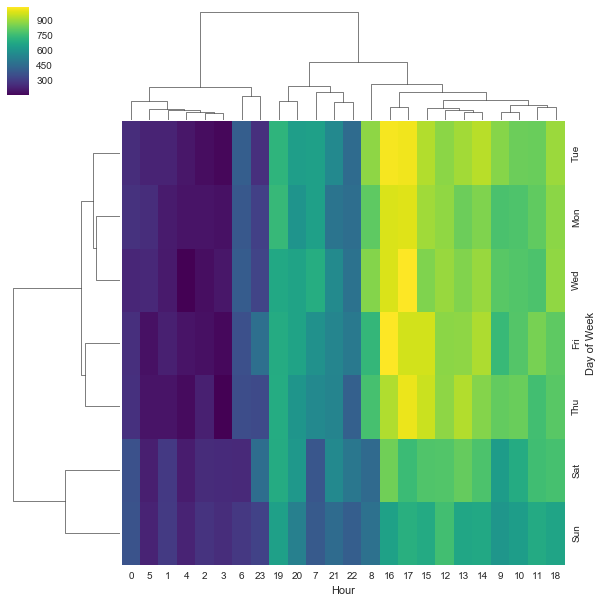

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [69]:
new2_df = df.groupby(by=["Day of week","Month"]).count()["Reason"].unstack()
new2_df

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


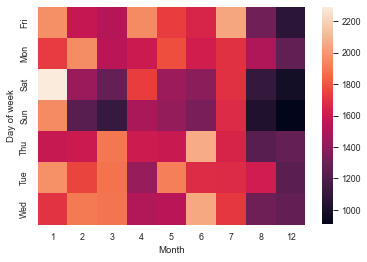

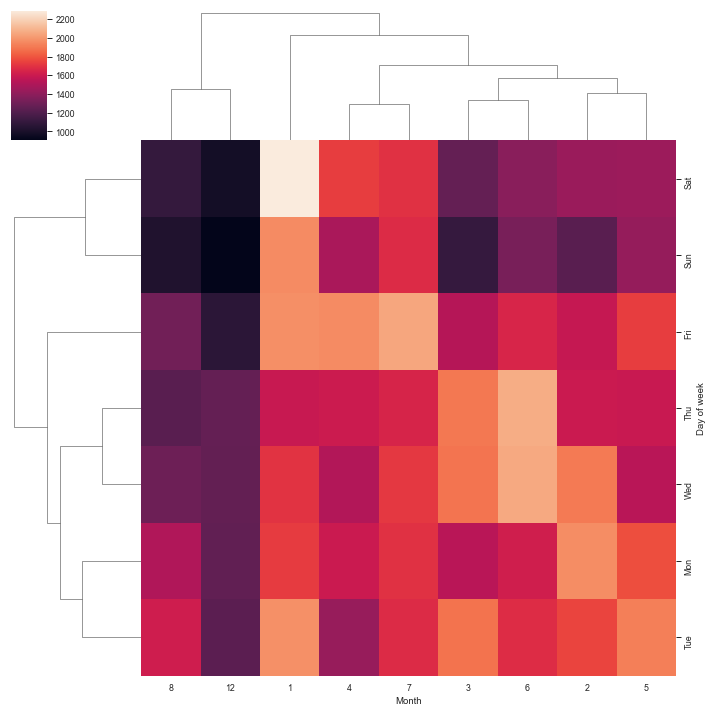

In [71]:
sns.heatmap(new2_df)
sns.clustermap(new2_df)

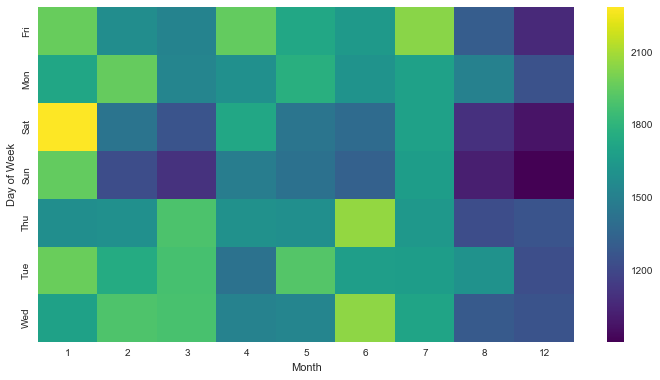

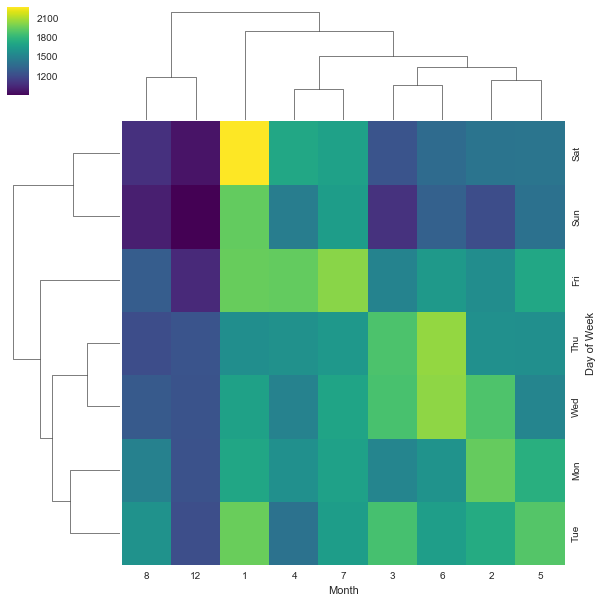

**Continue exploring the Data however you see fit!**
# Great Job!